<a href="https://colab.research.google.com/github/kiran20v/python/blob/master/Perceptron_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam 
# Adaptive method algoritms - Is better than vannila gradient descen(impletmented earlier)
import matplotlib.pyplot as plt
%matplotlib inline

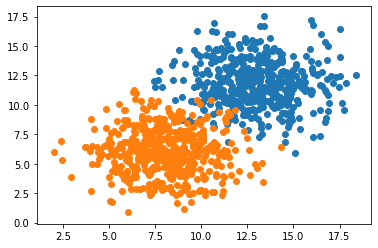

In [5]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
                np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

Using Convlutional Network - To achive gradient descent (adam)

In [0]:
model = Sequential()
model.add(Dense(units = 1, input_shape=(2,), activation='sigmoid'))
adam = Adam(lr=0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs=500, shuffle='true')

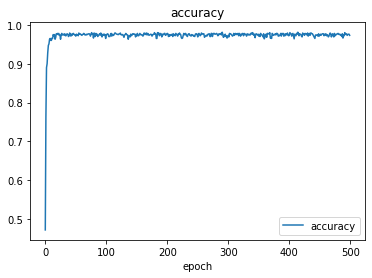

In [10]:
plt.plot(h.history['acc'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

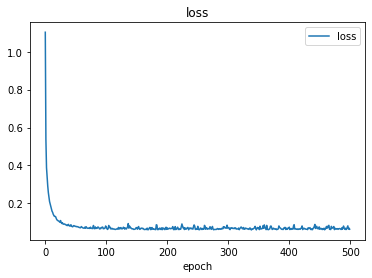

In [12]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [0]:
def plot_descision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 50)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1, 50)
    #print(y_span)
    xx, yy = np.meshgrid(x_span, y_span)
    #print(xx)
    #print(yy)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

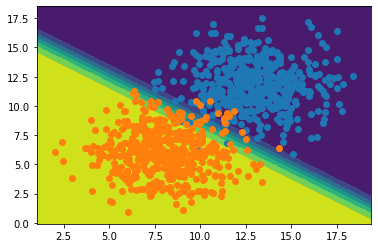

In [31]:
plot_descision_boundary(X, y, model)

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])